# Load a pre-trained model and try it out

In [1]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

Recommended readings: https://keras.io/applications/#applications

You may see models being downloaded if it is not already on your disk

In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
from tensorflow.keras.applications import resnet50

model = resnet50.ResNet50(weights='imagenet') # taking input as 224 x 224 x 3 images

Now download some image from Google Image to the local folder, and classify it using the loaded model

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
#filename = 'elephant.png' # set it to the name of the file you downloaded
filename = 'elephant2.jpg'

# Keras uses the PIL format for loading images.
# Thus, the image is in width x height x channels format.
original = load_img(filename, target_size=(224, 224)) # image object
print('PIL image size', original.size)


PIL image size (224, 224)


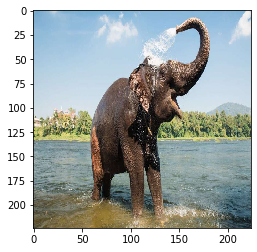

(224, 224, 3)

In [5]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original) # image object -> pixel array
# print(numpy_image.dtype)
plt.imshow(np.uint8(numpy_image))
plt.show()
numpy_image.shape

image batch size (1, 224, 224, 3)


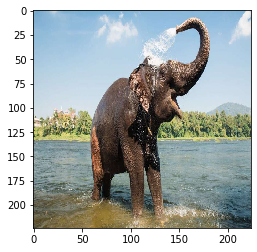

In [6]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
# print(numpy_image.dtype)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [7]:
# Preprocess the input by subtracting the mean value from each channel of the images in the batch.
# Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet.
# The mean values for Imagenet are: [103.939, 116.779, 123.68].
# This is done using the preprocess_input() function.
processed_image = resnet50.preprocess_input(image_batch.copy()) # need deep-copy as it will change the image_batch
(image_batch - processed_image)[0][0][0]

array([ 59.939003, 116.779   , 167.68    ], dtype=float32)

In [8]:
# get the predicted probabilities for each class
predictions = model.predict(processed_image)
predictions.shape # 1 image, 1000 classes (values are scores)

(1, 1000)

In [9]:
# convert the probabilities to class labels
# We will get the top 5 predictions which is the default
label = resnet50.decode_predictions(predictions)
#label = resnet50.decode_predictions(predictions, top=25)
label # list of (class_name, class_description, score)

40960/35363 [==================================] - 0s 0us/step


[[('n02504013', 'Indian_elephant', 0.79970795),
  ('n01871265', 'tusker', 0.17438142),
  ('n02504458', 'African_elephant', 0.024420192),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.00059413345),
  ('n02410509', 'bison', 7.9039775e-05)]]

Note: ImageNet is based upon WordNet which groups words into sets of synonyms (synsets). Each synset is assigned a “wnid” (Wordnet ID). Note that in a general category, there can be many subcategories and each of them will belong to a different synset. For example Working Dog ( sysnet = n02103406 ), Guide Dog ( sysnet = n02109150 ), and Police Dog ( synset = n02106854 ) are three different synsets.

Now try to download **5 images**, and predict them in **one batch** using **another model** (e.g., VGG16 or InceptionV3) below.

Recommended reading: https://keras.io/applications/

# Using VGG16

# Source: https://keras.io/applications/

In [30]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
import numpy as np

model = VGG19(weights='imagenet')


574717952/574710816 [==============================] - 10s 0us/step


# Predict 5 Images - I love Armadillos so I'm going to use one Armadillo

In [31]:
model_VGG19 = VGG19(weights='imagenet')

#Reference code
# model = ResNet50(weights='imagenet')
# img_path = 'elephant.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

#Append all to here
images_input=[]

#Armadillo photo
photo = 'armadillo.jpg'
armadillo = load_img(photo, target_size=(224, 224))
images_input.append(armadillo)

#Octupus
photo = 'octupus.jpg'
octupus = load_img(photo, target_size=(224, 224))
images_input.append(octupus)

#Penguin
photo = 'penguin.jpg'
penguin = load_img(photo, target_size=(224, 224))
images_input.append(penguin)

#Tiger King BABY
photo = 'tiger_king.jpg'
tiger_king = load_img(photo, target_size=(224, 224))
images_input.append(tiger_king)

#Upright Bass
photo = 'upright bass.jpg'
upright_bass = load_img(photo, target_size=(224, 224))
images_input.append(upright_bass)

#Joe Exotic
photo = 'joe.jpg'
joe = load_img(photo, target_size=(224, 224))
images_input.append(joe)

#PIKACHUUUUUUUUUUUUUUUUUUUUUUUUUUUUU
photo = 'pikachu.png'
pikachu = load_img(photo, target_size=(224, 224))
images_input.append(pikachu)


# Make Predictions

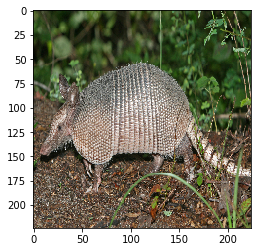

armadillo (100.00%)


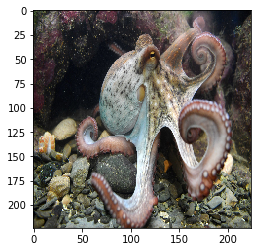

eel (43.04%)


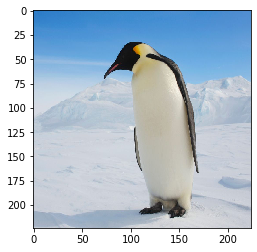

king_penguin (100.00%)


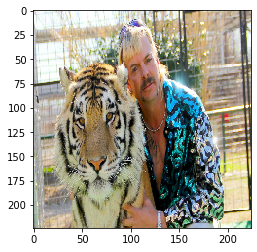

tiger (77.89%)


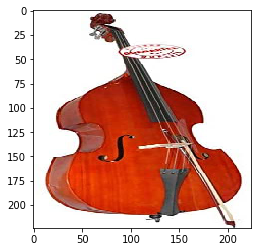

cello (51.78%)


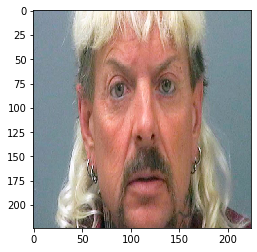

wig (86.04%)


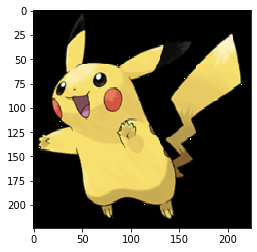

piggy_bank (19.26%)


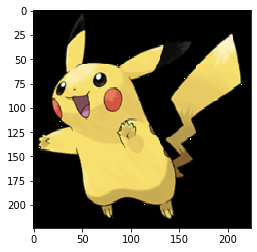

In [32]:
#For in the range of the image
for i in range(7):
    
    #Code from https://keras.io/applications/
    numpyimage_inputs = img_to_array(images_input[i]) 
    plt.imshow(np.uint8(numpyimage_inputs))
    plt.show()
    numpyimage_inputs.shape
    
    #Replicating code from above
    image_batch = np.expand_dims(numpyimage_inputs, axis=0)
    plt.imshow(np.uint8(image_batch[0]))
    
    ## Preprocess the input by subtracting the mean value from each channel of the images in the batch.
    # Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet.
    # The mean values for Imagenet are: [103.939, 116.779, 123.68].
    # This is done using the preprocess_input() function.
    processed_images= preprocess_input(image_batch.copy()) 
    (image_batch- processed_images)[0][0][0]

    # get the predicted probabilities for each class - VGG16
    preds = model_VGG19.predict(processed_images)
    y = model_VGG19.predict(processed_images)
    
    # convert the probabilities to class labels
    # We will get the predictions which is the default
    label = decode_predictions(y)
    label = label[0][0]
    print('%s (%.2f%%)' % (label[1], label[2]*100))

